In [ ]:
import cv2
from PIL import Image

In [ ]:
img = cv2.imread("1.jpg")

In [ ]:
img = Image.fromarray(img)

In [ ]:
with open("1.txt", "r") as f:
    annot = f.read().strip().split('\n')

In [ ]:
annot

['308.13016 342.97598 325.561 290.71518 -0.61894226 11.616585 61.213005 48.977478 हर',
 '360.30127 460.05957 466.0652 366.3069 289.50754 280.90695 350.5665 359.16708 टन',
 '-15.855541 79.55577 103.89937 8.488056 75.214584 13.074905 50.452866 112.592545 पर',
 '152.55396 225.3407 227.85556 155.06882 337.61462 330.4391 355.94928 363.12482 तहत',
 '373.50073 426.27148 426.34534 373.5746 28.868343 28.762894 65.70723 65.81268 भूल',
 '264.81186 300.2727 282.43863 246.9778 -2.8271713 9.167442 61.891975 49.89736 उसे',
 '-10.7492695 60.400486 73.17431 2.0245552 128.22935 83.59273 103.95392 148.59055 आप',
 '254.13028 332.01706 308.94638 231.0596 69.69014 109.53428 154.63249 114.78835 मगर',
 '13.464556 68.82896 77.9091 22.544703 147.13727 113.19711 128.00897 161.94913 लगती',
 '159.09607 206.10431 208.7377 161.72946 310.3138 305.46243 330.97903 335.8304 वह',
 '160.7095 188.38663 177.81076 150.13364 5.6476784 19.85205 40.459045 26.254673 उन',
 '143.67262 167.10182 156.8557 133.4265 52.546547 64.52573

`[(x1, y1), (x2, y2), ...]`

In [ ]:
coordinates = []

for a in annot:
    vals = a.split()[:-1]
    coord = []
    for i in range(4):
        x = int(float(vals[i]))
        y = int(float(vals[i+4]))
        coord.append((x if x >= 0 else 0, y if y >= 0 else 0))
    
    coordinates.append(coord)

In [ ]:
coordinates

[[(308, 0), (342, 11), (325, 61), (290, 48)],
 [(360, 289), (460, 280), (466, 350), (366, 359)],
 [(0, 75), (79, 13), (103, 50), (8, 112)],
 [(152, 337), (225, 330), (227, 355), (155, 363)],
 [(373, 28), (426, 28), (426, 65), (373, 65)],
 [(264, 0), (300, 9), (282, 61), (246, 49)],
 [(0, 128), (60, 83), (73, 103), (2, 148)],
 [(254, 69), (332, 109), (308, 154), (231, 114)],
 [(13, 147), (68, 113), (77, 128), (22, 161)],
 [(159, 310), (206, 305), (208, 330), (161, 335)],
 [(160, 5), (188, 19), (177, 40), (150, 26)],
 [(143, 52), (167, 64), (156, 84), (133, 72)]]

In [ ]:
boxes = []
yolo_annots = []

for coord in coordinates:
    top, _, _, bottom = sorted(coord, key=lambda c: c[1])
    left, _, _, right = sorted(coord, key=lambda c: c[0])
    
    top_left = (left[0], top[1]) 
    bottom_right = (right[0], bottom[1])
    
    center_x, center_y = (top_left[0] + bottom_right[0]) / 2, (top_left[1] + bottom_right[1]) / 2
    width, height = abs(top_left[0] - bottom_right[0]), abs(top_left[1] - bottom_right[1])
    
    boxes.append((top_left, bottom_right))
    
    yolo_annots.append((0, center_x / img.width, 3, center_y / img.height, width / img.width, height / img.height))

In [ ]:
yolo_annots

[(0, 0.527, 0.06777777777777778, 0.08666666666666667, 0.13555555555555557),
 (0, 0.688, 0.71, 0.17666666666666667, 0.17555555555555555),
 (0, 0.086, 0.1388888888888889, 0.17166666666666666, 0.22),
 (0, 0.316, 0.77, 0.125, 0.07333333333333333),
 (0, 0.666, 0.10333333333333333, 0.08833333333333333, 0.08222222222222222),
 (0, 0.455, 0.06777777777777778, 0.09, 0.13555555555555557),
 (0, 0.061, 0.25666666666666665, 0.12166666666666667, 0.14444444444444443),
 (0, 0.469, 0.2477777777777778, 0.16833333333333333, 0.18888888888888888),
 (0, 0.075, 0.30444444444444446, 0.10666666666666667, 0.10666666666666667),
 (0, 0.306, 0.7111111111111111, 0.08166666666666667, 0.06666666666666667),
 (0, 0.282, 0.05, 0.06333333333333334, 0.07777777777777778),
 (0, 0.25, 0.1511111111111111, 0.056666666666666664, 0.07111111111111111)]

In [ ]:
yolo_annotation_string = []
for y in yuyoolo_annots:
    yolo_annotation_string.append(" ".join(list(map(lambda x: str(round(x, 3)), y))))

In [ ]:
"\n".join(yolo_annotation_string)

'0 0.527 0.068 0.087 0.136\n0 0.527 0.068 0.087 0.136\n0 0.527 0.068 0.087 0.136\n0 0.527 0.068 0.087 0.136\n0 0.527 0.068 0.087 0.136\n0 0.527 0.068 0.087 0.136\n0 0.527 0.068 0.087 0.136\n0 0.527 0.068 0.087 0.136\n0 0.527 0.068 0.087 0.136\n0 0.527 0.068 0.087 0.136\n0 0.527 0.068 0.087 0.136\n0 0.527 0.068 0.087 0.136'

In [ ]:
for box in boxes:
    cv2.rectangle(img, box[0], box[1], (255,0,0), 2)

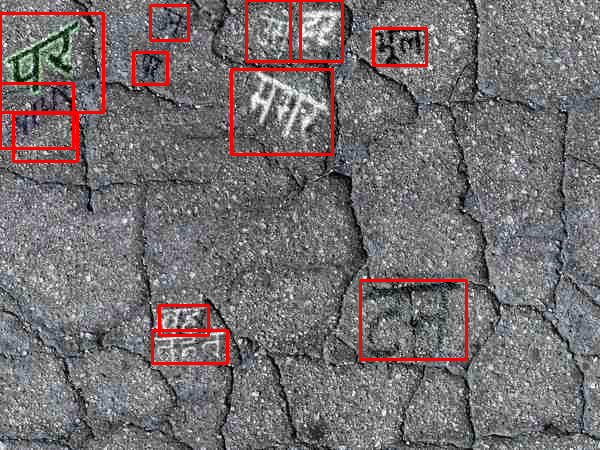

In [ ]:
Image.fromarray(img)

In [ ]:
cx, cy, w, h